In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class  label','Alcohol','Malic acid']

In [26]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


* sns.kdeplot use

* Plot univariate or bivariate distributions using kernel density estimation.

* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.



<Axes: xlabel='Alcohol', ylabel='Density'>

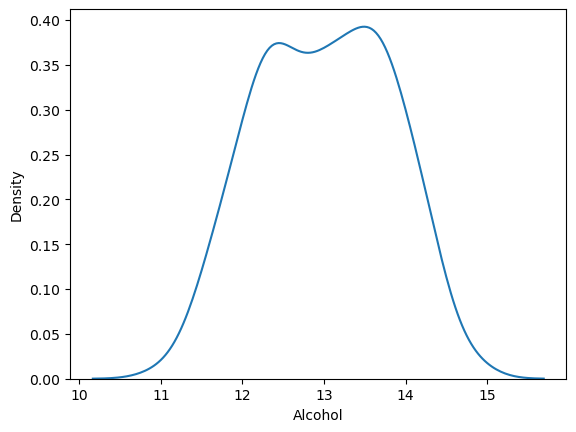

In [9]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

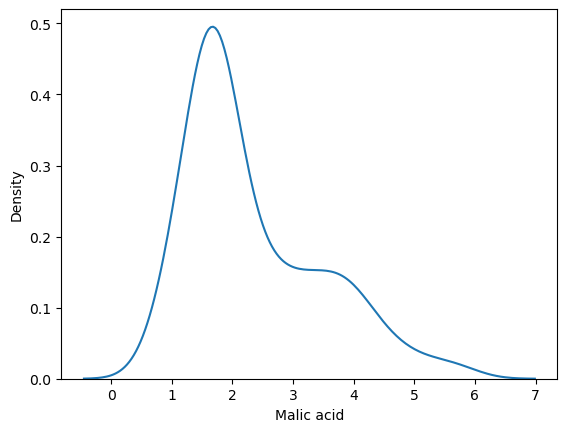

In [11]:
sns.kdeplot(df['Malic acid'])

In [108]:
print(df.columns)

Index(['Class  label', 'Alcohol', 'Malic acid'], dtype='object')


In [118]:
#It means "Class label " has an extra space. You can rename it properly
df.rename(columns={'Class  label': "Class label"}, inplace=True)
print(df.columns)

Index(['Class label', 'Alcohol', 'Malic acid'], dtype='object')


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

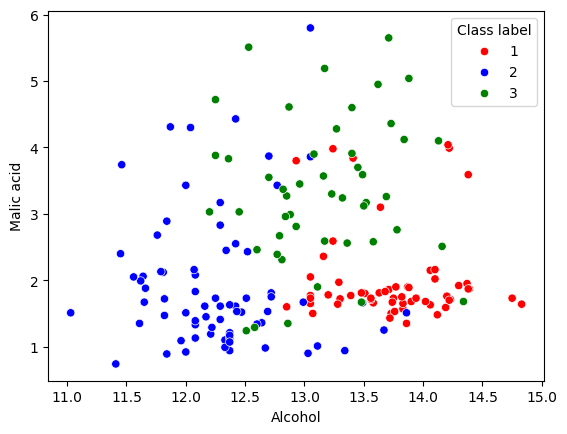

In [120]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis=1),
                                                df['Class label'],
                                                test_size=0.3,
                                                random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(

# fit the scaler to the train set, it will learn the parameters 
scaler.fit(X_train)


MinMaxScaler()

In [130]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [134]:
np.round(X_train.describe(),1)
#here we have
# max = 14.8,5.6 
# min = 14.8,5.6

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [136]:
np.round(X_train_scaled.describe(),1)
#here we have
# max = 1,1 
# min = 0,0

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


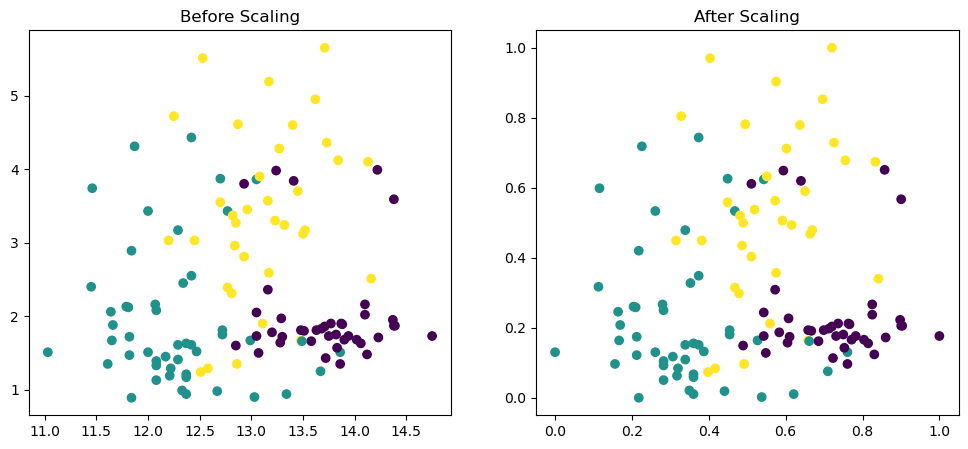

In [144]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

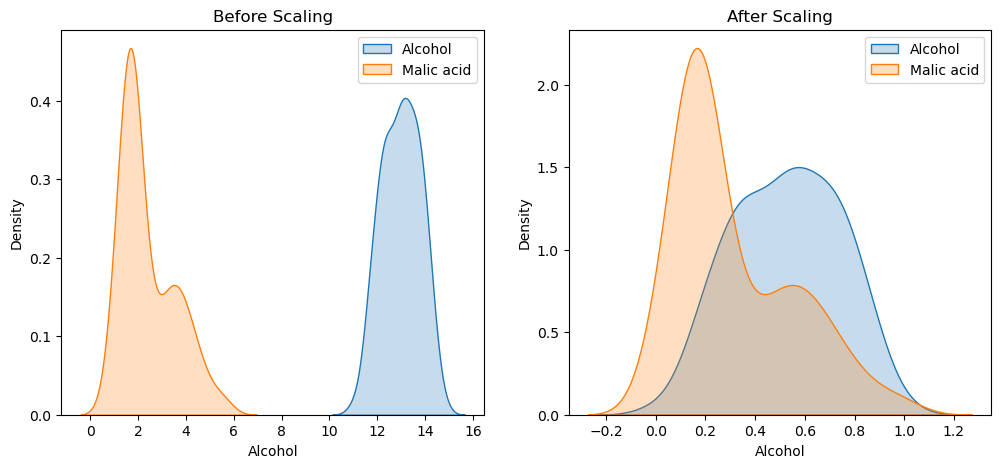

In [180]:
# Create KDE Plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# KDE before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol', fill=True)
sns.kdeplot(X_train['Malic acid'], ax=ax1, label='Malic acid', fill=True)
ax1.legend()
# KDE after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Alcohol', fill=True)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, label='Malic acid', fill=True)
ax2.legend()
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

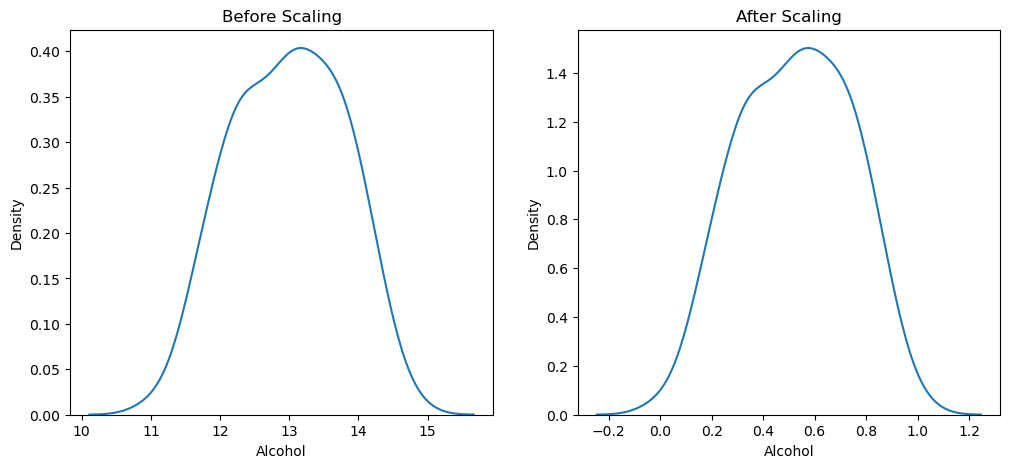

In [188]:
# Create KDE Plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Alcohol')

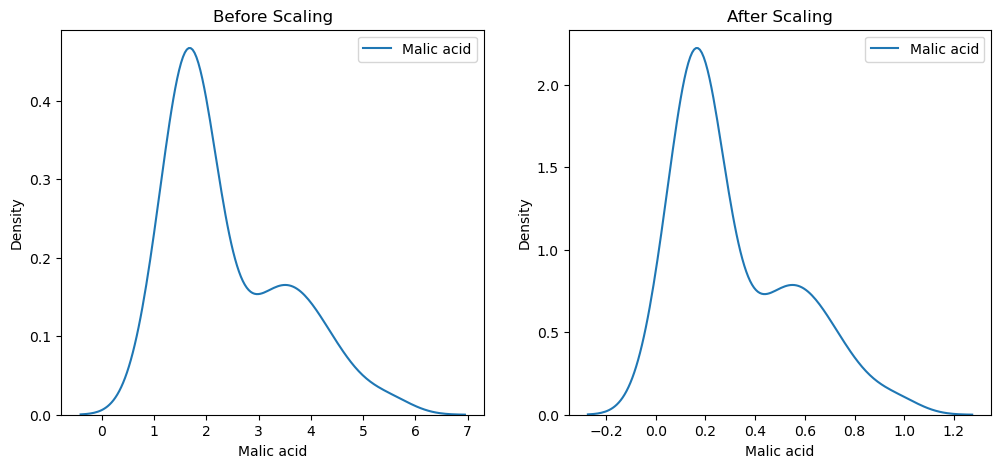

In [196]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1, label='Malic acid')
ax1.legend()
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, label='Malic acid')
ax2.legend()